In [121]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [122]:
input_dir = Path("../data")
output_dir = Path("../data_out")
image_output_dir = output_dir / "images"

image_output_dir.mkdir(exist_ok=True, parents=True)

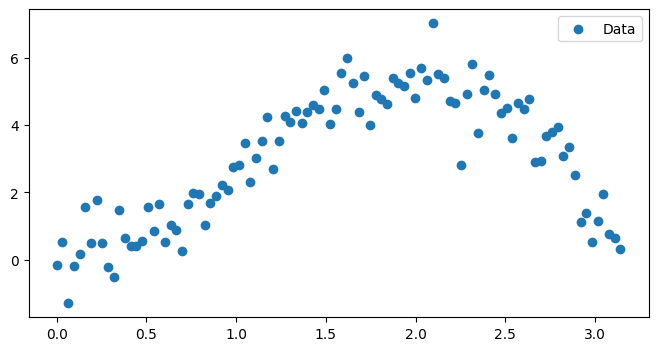

In [123]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

# Step 1: Generate dataset
# x = np.linspace(0, 3 * np.pi / 4, 100)
x = np.linspace(0, np.pi, 100)
y_true = 3*np.sin(x)*x
noise = np.random.normal(0, 0.7, y_true.shape)
y_noisy = y_true + noise

# Create figure for original dataset
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data')
# ax.plot(x, y_true, label='Learned Function', color='orange')
ax.legend()
# ax.set_title('Dataset')
plt.show()

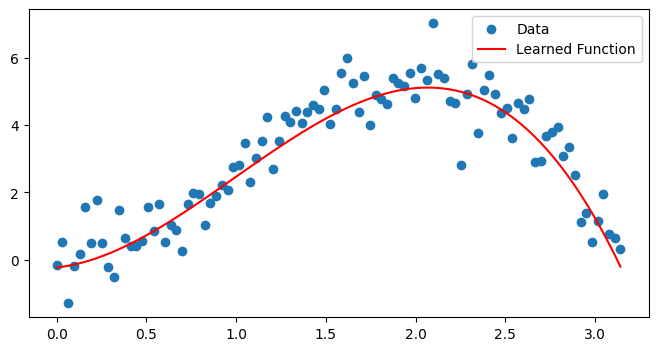

In [124]:
# Step 2: Fit a low-order polynomial (median polynomial)
poly_deg = 3
p_mean = Polynomial.fit(x, y_noisy, poly_deg)
y_mean = p_mean(x) - 0.2  # -0.2 to make it easier to differentiate with median

# Create figure for dataset with fitted polynomial
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data')
ax.plot(x, y_mean, label='Learned Function', color='red')
ax.legend()
# ax.set_title('Dataset with learned function')
plt.show()

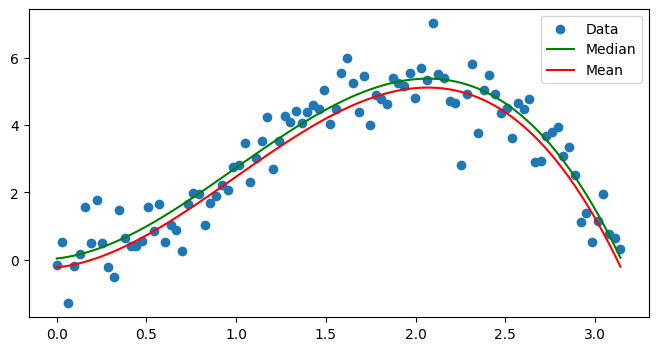

In [125]:
# Step 3: Shift the polynomial such that 50% of the data is above and 50% below
y_median = y_mean + np.quantile(y_noisy - y_mean, 0.5)

# Create figure for dataset with median polynomial
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data')
ax.plot(x, y_median, label='Median', color='green')
ax.plot(x, y_mean, label='Mean', color='red')
ax.legend()
# ax.set_title('Dataset with median polynomial')
plt.show()

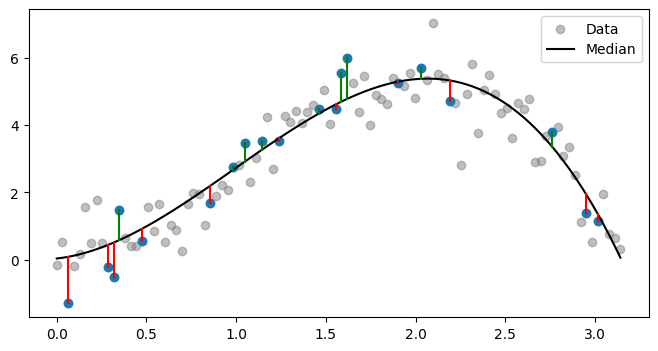

In [126]:
# Step 4: Compute the residuals
residuals = y_noisy - y_median
positive_residuals = residuals[residuals > 0]
negative_residuals = residuals[residuals < 0]
x_positive = x[residuals > 0]
x_negative = x[residuals < 0]

# Create figure for subset with residuals
fig, ax = plt.subplots(figsize=(8, 4))
subset_idx = np.random.choice(len(x), 20, replace=False)
ax.scatter(x, y_noisy, label='Data', color=[0.5, 0.5, 0.5, 0.5])
ax.scatter(x[subset_idx], y_noisy[subset_idx])
ax.plot(x, y_median, label='Median', color='black')
for xi, yi, y_med in zip(x[subset_idx], y_noisy[subset_idx], y_median[subset_idx]):
    if yi > y_med:
        ax.plot([xi, xi], [yi, y_med], color='green')
    else:
        ax.plot([xi, xi], [yi, y_med], color='red')
ax.legend()
# ax.set_title('Subset with residuals')
plt.show()

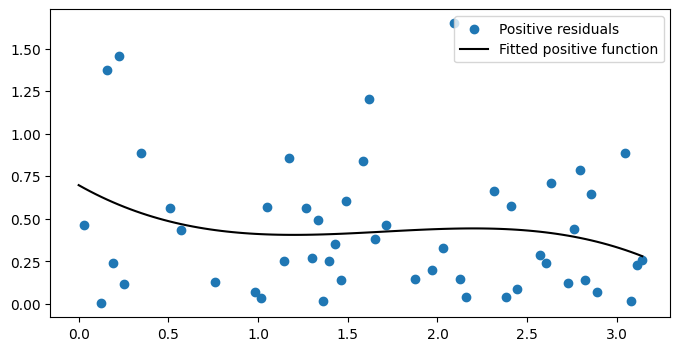

In [127]:
# Step 5: Fit two polynomials to the positive and negative residuals
p_positive = Polynomial.fit(x_positive, positive_residuals, poly_deg)
p_negative = Polynomial.fit(x_negative, negative_residuals, poly_deg)

# Create figure for positive residuals and fitted polynomial
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x_positive, positive_residuals, label='Positive residuals')
ax.plot(x, p_positive(x), label='Fitted positive function', color='black')
ax.legend()
# ax.set_title('Positive residuals with fitted polynomial')
plt.show()

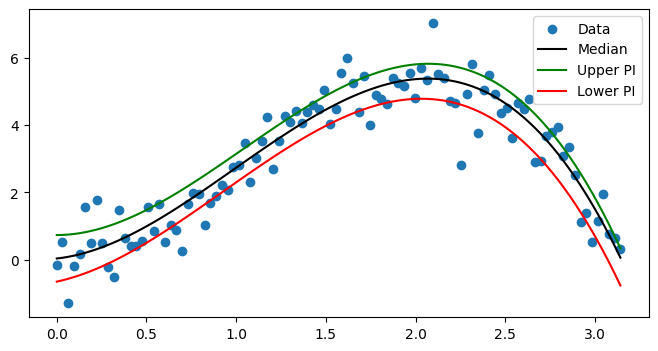

In [128]:
# Step 6: Create upper and lower functions
y_upper = y_median + p_positive(x)
y_lower = y_median + p_negative(x)

# Create figure for dataset with upper and lower functions
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data')
ax.plot(x, y_median, label='Median', color='black')
ax.plot(x, y_upper, label='Upper PI', color='green')
ax.plot(x, y_lower, label='Lower PI', color='red')
ax.legend()
# ax.set_title('Dataset with upper and lower functions')
plt.show()

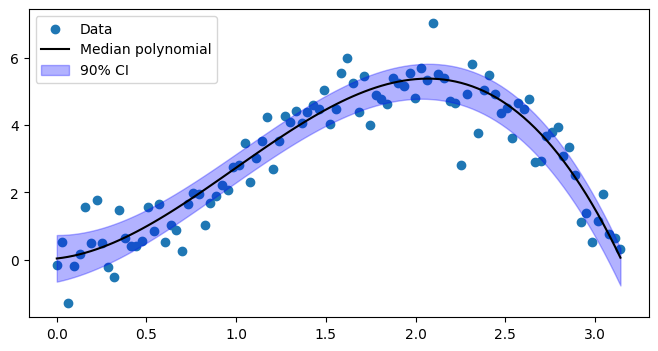

In [129]:
# Create figure for dataset with upper and lower functions as a transparent area
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data')
ax.plot(x, y_median, label='Median polynomial', color='black')
ax.fill_between(x, y_lower, y_upper, color='blue', alpha=0.3, label="90% CI")
ax.legend()
# ax.set_title('Dataset with upper and lower functions (transparent area)')
plt.show()

# All in one

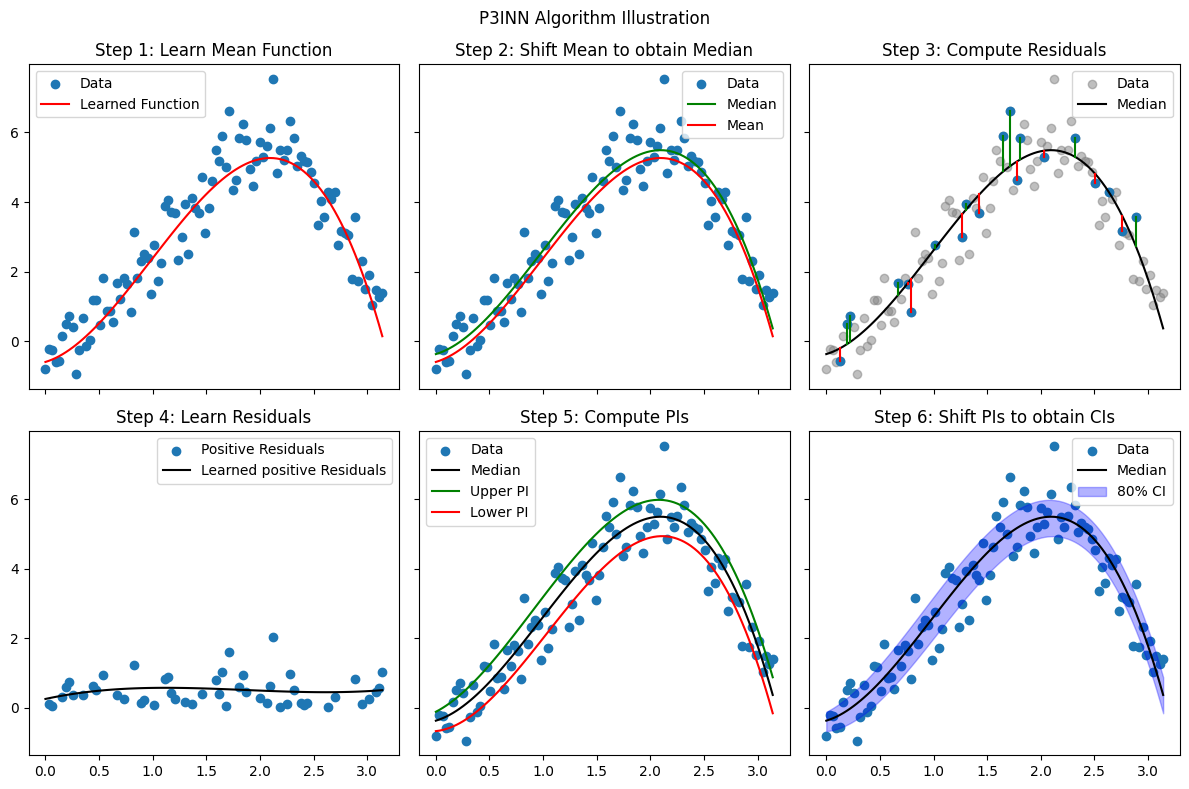

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Step 1: Generate dataset
x = np.linspace(0, np.pi, 100)
y_true = 3*np.sin(x)*x
noise = np.random.normal(0, 0.7, y_true.shape)
y_noisy = y_true + noise

# Step 2: Fit a low-order polynomial (median polynomial)
poly_deg = 3
p_mean = Polynomial.fit(x, y_noisy, poly_deg)
y_mean = p_mean(x) - 0.2  # -0.2 to make it easier to differentiate with median

# Step 3: Shift the polynomial such that 50% of the data is above and 50% below
y_median = y_mean + np.quantile(y_noisy - y_mean, 0.5)

# Step 4: Compute the residuals
residuals = y_noisy - y_median
positive_residuals = residuals[residuals > 0]
negative_residuals = residuals[residuals < 0]
x_positive = x[residuals > 0]
x_negative = x[residuals < 0]

# Step 5: Fit two polynomials to the positive and negative residuals
p_positive = Polynomial.fit(x_positive, positive_residuals, poly_deg)
p_negative = Polynomial.fit(x_negative, negative_residuals, poly_deg)

# Step 6: Create upper and lower functions
y_upper = y_median + p_positive(x)
y_lower = y_median + p_negative(x)

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("P3INN Algorithm Illustration")

# Plot for Step 1
axes[0, 0].scatter(x, y_noisy, label='Data')
axes[0, 0].plot(x, y_mean, label='Learned Function', color='red')
axes[0, 0].legend()
axes[0, 0].set_title('Step 1: Learn Mean Function')

# Plot for Step 2
axes[0, 1].scatter(x, y_noisy, label='Data')
axes[0, 1].plot(x, y_median, label='Median', color='green')
axes[0, 1].plot(x, y_mean, label='Mean', color='red')
axes[0, 1].legend()
axes[0, 1].set_title('Step 2: Shift Mean to obtain Median')

# Plot for Step 3
axes[0, 2].scatter(x, y_noisy, label='Data', color=[0.5, 0.5, 0.5, 0.5])
subset_idx = np.random.choice(len(x), 20, replace=False)
axes[0, 2].scatter(x[subset_idx], y_noisy[subset_idx])
axes[0, 2].plot(x, y_median, label='Median', color='black')
for xi, yi, y_med in zip(x[subset_idx], y_noisy[subset_idx], y_median[subset_idx]):
    if yi > y_med:
        axes[0, 2].plot([xi, xi], [yi, y_med], color='green')
    else:
        axes[0, 2].plot([xi, xi], [yi, y_med], color='red')
axes[0, 2].legend()
axes[0, 2].set_title('Step 3: Compute Residuals')

# Plot for Step 4
axes[1, 0].scatter(x_positive, positive_residuals, label='Positive Residuals')
axes[1, 0].plot(x, p_positive(x), label='Learned positive Residuals', color='black')
axes[1, 0].legend()
axes[1, 0].set_title('Step 4: Learn Residuals')

# Plot for Step 5
axes[1, 1].scatter(x, y_noisy, label='Data')
axes[1, 1].plot(x, y_median, label='Median', color='black')
axes[1, 1].plot(x, y_upper, label='Upper PI', color='green')
axes[1, 1].plot(x, y_lower, label='Lower PI', color='red')
axes[1, 1].legend()
axes[1, 1].set_title('Step 5: Compute PIs')

# Plot for Step 6
axes[1, 2].scatter(x, y_noisy, label='Data')
axes[1, 2].plot(x, y_median, label='Median', color='black')
axes[1, 2].fill_between(x, y_lower, y_upper, color='blue', alpha=0.3, label="80% CI")
axes[1, 2].legend()
axes[1, 2].set_title('Step 6: Shift PIs to obtain CIs')

plt.tight_layout()

fig.savefig(image_output_dir / "3pinn_illustration.png")

plt.show()

# How it looks for our concentration "field"

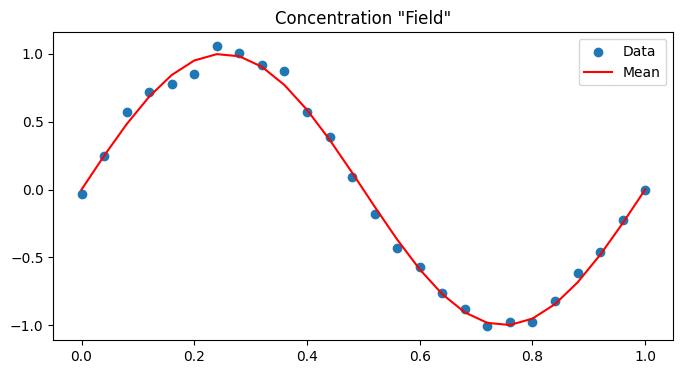

In [141]:
def fun(x):
    return np.sin(x * 2 * np.pi)
x_concentration = np.linspace(0, 1, 26)
y_concentration = np.sin(x_concentration * 2 * np.pi)
y_concentration_data = np.sin(x_concentration * 2 * np.pi) + np.random.normal(0, 0.05, x_concentration.shape)

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x_concentration, y_concentration_data, label='Data')
ax.plot(x_concentration, y_concentration, label='Mean', color='red')
# x_plot = np.linspace(0, 1, 100)
# ax.plot(x_plot, fun(x_plot), label='Mean', color='red')
ax.legend()
ax.set_title('Concentration "Field"')
plt.show()

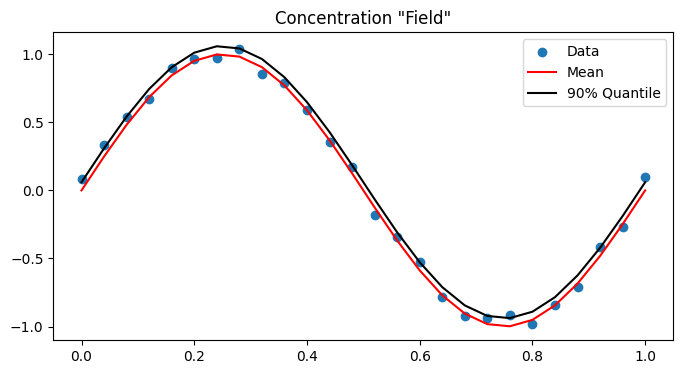

In [144]:
def fun(x):
    return np.sin(x * 2 * np.pi)
x_concentration = np.linspace(0, 1, 26)
y_concentration = np.sin(x_concentration * 2 * np.pi)
y_concentration_data = np.sin(x_concentration * 2 * np.pi) + np.random.normal(0, 0.05, x_concentration.shape)

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x_concentration, y_concentration_data, label='Data')
ax.plot(x_concentration, y_concentration, label='Mean', color='red')
ax.plot(x_concentration, y_concentration+0.06, label='90% Quantile', color='black')
# x_plot = np.linspace(0, 1, 100)
# ax.plot(x_plot, fun(x_plot), label='Mean', color='red')
ax.legend()
ax.set_title('Concentration "Field"')
plt.show()